### this script is to copy Station csv files to a folder 


will provide the precipitation in mm 


In [1]:
import os, glob,shutil
import zipfile 


In [2]:
import wget

In [3]:
import warnings
warnings.simplefilter('ignore')


In [ ]:
pwd = os.getcwd()
dest_dir =os.path.join(pwd,'stationCSV')
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)
datapath = os.path.join(pwd, 'data')
if not os.path.exists(datapath):
    os.makedirs(datapath)
zipfolder=os.path.join(datapath, 'temp')
if not os.path.exists(zipfolder):
        os.makedirs(zipfolder)

unzipfolder=os.path.join(datapath, 'unzip')
if not os.path.exists(unzipfolder):
     os.makedirs(unzipfolder)
        
        
for year in range(1895,2022):
    url = 'https://ftp.prism.oregonstate.edu/monthly/ppt/'+str(year)+'/'
    if year<1981:
        zip_fileName = 'PRISM_ppt_stable_4kmM2_'+str(year)+'_all_bil.zip'
    else:
        zip_fileName = 'PRISM_ppt_stable_4kmM3_'+str(year)+'_all_bil.zip'
        
        
    zipFile=os.path.join(zipfolder,zip_fileName)
    url = url + zip_fileName
    wget.download(url,zipFile)
    print ("SUCCESS - " + zip_fileName)                
    
    with zipfile.ZipFile(zipFile,'r') as z:
        z.extractall(unzipfolder)
        z.close() 
    os.chdir(unzipfolder)
    files = glob.glob("*.csv")
    print(files)
    
    
    for file in files:
        if os.path.isfile(file):
            shutil.copy2(file, dest_dir)        
            
    os.chdir(zipfolder)
    os.remove(zip_fileName)
    ## remove those unzipped files
    os.chdir(unzipfolder)
    unzipfiles = glob.glob('*.*')
    for f in unzipfiles:
        os.remove(f)    
    

# extracting the stations within the EAA region

- lat [28.9, 30.4]
- lon [-100.7, -97.5]

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
#from pytz import all_timezones

In [5]:
import datetime

In [6]:
folder = r'F:\projects\PRISM\stationCSV'
os.chdir(folder)

In [9]:
csvfiles = glob.glob('*.csv')
finalEAA=pd.DataFrame()
for file in csvfiles:
    yrMonth = file.split('_')[4]
    print(yrMonth)
    #yr = yrMonth[:4]
    #month =yrMonth[-2:]
    dt = datetime.datetime.strptime(yrMonth, '%Y%m')
    file = os.path.join(folder,file)
    df =pd.read_csv(file,skiprows=1)
    if 'LON' in df.columns:
        df=df.rename(columns = {'LON':'Longitude'})
    if 'LAT' in df.columns:
        df=df.rename(columns = {'LAT':'Latitude'})
    if 'ELEV(m)' in df.columns:
        df=df.rename(columns = {'ELEV(m)':'Elevation(m)'})
    if 'ID' in df.columns:
        df=df.rename(columns = {'ID':'Station'})
    if 'NAME' in df.columns:
        df=df.rename(columns = {'NAME':'Name'})
    if 'station_id' in df.columns:
        df=df.rename(columns = {'station_id':'stnid'})
    cond1 = df.Longitude.between(-100.5, -97.5)
        
    cond2 = df.Latitude.between(28.5, 30.5)
    
    dfEAA = df[cond1 & cond2]
    dfEAA.loc[:,'date'] = [pd.to_datetime(dt).to_period('M')]*len(dfEAA)
    if len(finalEAA)==0:
        finalEAA = dfEAA
    else:
        finalEAA =pd.concat([finalEAA,dfEAA],axis=0)

189501
189502
189503
189504
189505
189506
189507
189508
189509
189510
189511
189512
189601
189602
189603
189604
189605
189606
189607
189608
189609
189610
189611
189612
189701
189702
189703
189704
189705
189706
189707
189708
189709
189710
189711
189712
189801
189802
189803
189804
189805
189806
189807
189808
189809
189810
189811
189812
189901
189902
189903
189904
189905
189906
189907
189908
189909
189910
189911
189912
190001
190002
190003
190004
190005
190006
190007
190008
190009
190010
190011
190012
190101
190102
190103
190104
190105
190106
190107
190108
190109
190110
190111
190112
190201
190202
190203
190204
190205
190206
190207
190208
190209
190210
190211
190212
190301
190302
190303
190304
190305
190306
190307
190308
190309
190310
190311
190312
190401
190402
190403
190404
190405
190406
190407
190408
190409
190410
190411
190412
190501
190502
190503
190504
190505
190506
190507
190508
190509
190510
190511
190512
190601
190602
190603
190604
190605
190606
190607
190608
190609
190610
190611

199211
199212
199301
199302
199303
199304
199305
199306
199307
199308
199309
199310
199311
199312
199401
199402
199403
199404
199405
199406
199407
199408
199409
199410
199411
199412
199501
199502
199503
199504
199505
199506
199507
199508
199509
199510
199511
199512
199601
199602
199603
199604
199605
199606
199607
199608
199609
199610
199611
199612
199701
199702
199703
199704
199705
199706
199707
199708
199709
199710
199711
199712
199801
199802
199803
199804
199805
199806
199807
199808
199809
199810
199811
199812
199901
199902
199903
199904
199905
199906
199907
199908
199909
199910
199911
199912
200001
200002
200003
200004
200005
200006
200007
200008
200009
200010
200011
200012
200101
200102
200103
200104
200105
200106
200107
200108
200109
200110
200111
200112
200201
200202
200203
200204
200205
200206
200207
200208
200209
200210
200211
200212
200301
200302
200303
200304
200305
200306
200307
200308
200309
200310
200311
200312
200401
200402
200403
200404
200405
200406
200407
200408
200409

In [10]:
finalEAA

,Station,Name,Longitude,Latitude,Elevation(m),Network,date,stnid
1201,410902,BOERNE,-98.7500,29.8167,430,COOP,1895-01,NaN
1209,417948,SAN ANTONIO,-98.4833,29.3333,183,COOP,1895-01,NaN
1202,410902,BOERNE,-98.7500,29.8167,430,COOP,1895-02,NaN
1207,417948,SAN ANTONIO,-98.4833,29.3333,183,COOP,1895-02,NaN
1281,417706,ROCKSPRINGS,-100.2167,30.0167,735,COOP,1895-03,NaN
...,...,...,...,...,...,...,...,...
18971,TX-HYS-250,WIMBERLEY 3.,-98.0967,30.0454,339,COCORAHS,2021-12,252885
18974,TX-HYS-251,WIMBERLEY 5.,-98.0222,30.0167,330,COCORAHS,2021-12,252916
19000,TX-GP-153,NEW BRAUNFEL,-98.0582,29.6565,190,COCORAHS,2021-12,253044
19029,TX-BLC-47,BLANCO 4.7 S,-98.3825,30.0406,410,COCORAHS,2021-12,253235


In [11]:
finalEAA = finalEAA.set_index('date')

In [13]:
folderNew = folder = r'F:\projects\PRISM'
os.chdir(folderNew)
finalEAA.to_csv('EAA_region_lat(28.5, 30.5)_lon(-100.5, -97.5).csv')

In [14]:
finalEAA.head()

,Station,Name,Longitude,Latitude,Elevation(m),Network,stnid
date,,,,,,,
1895-01,410902,BOERNE,-98.7500,29.8167,430,COOP,NaN
1895-01,417948,SAN ANTONIO,-98.4833,29.3333,183,COOP,NaN
1895-02,410902,BOERNE,-98.7500,29.8167,430,COOP,NaN
1895-02,417948,SAN ANTONIO,-98.4833,29.3333,183,COOP,NaN
1895-03,417706,ROCKSPRINGS,-100.2167,30.0167,735,COOP,NaN


In [16]:
stations_count = finalEAA['Station'].groupby('date').count()
stations_count 

date
1895-01      2
1895-02      2
1895-03      2
1895-04      2
1895-05      1
          ... 
2021-08    458
2021-09    501
2021-10    557
2021-11    568
2021-12    529
Freq: M, Name: Station, Length: 1523, dtype: int64

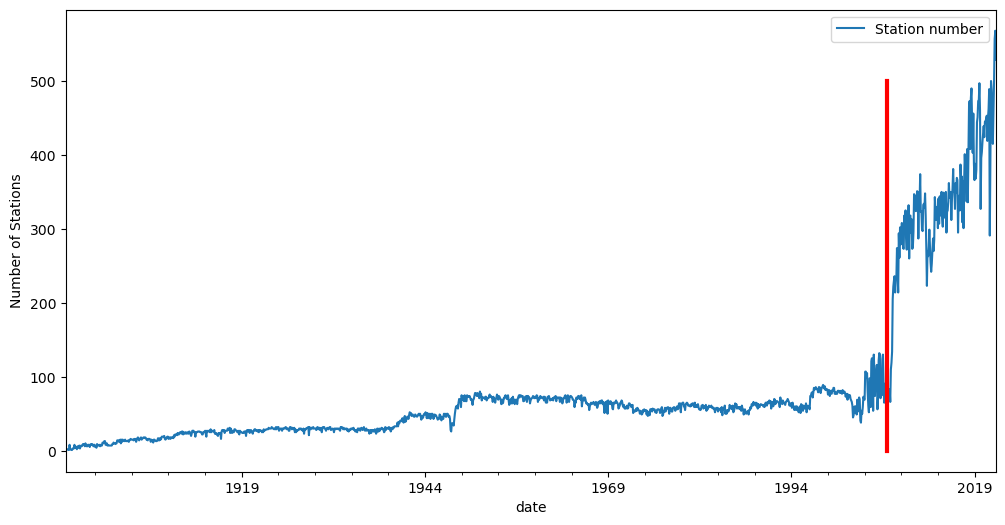

In [29]:
fig,ax = plt.subplots(figsize=(12,6))
stations_count.plot(ax=ax,label='Station number')
dt1 = datetime.datetime.strptime('200702', '%Y%m')
dt1 = pd.to_datetime(dt1).to_period('M')
ax.plot([dt1,dt1],[0,500],'r-',lw=3)
ax.set_ylabel('Number of Stations')
plt.legend(loc='best')

#plt.xlim('1950-01-01','2020-12-31')

In [30]:
stations_count.to_csv('PRISM_Precipitation_station_Numbers_EAA_region.csv')

In [33]:
finalEAA.loc[:,'year'] = finalEAA.index.year
numbPstation=[]
for yr in finalEAA['year'].unique():
    df1 = finalEAA[finalEAA['year']==yr]
    nstation= len(df1['Station'].unique())
    numbPstation.append([yr,nstation])
    
numbStationP = pd.DataFrame(numbPstation,columns=['year','number of station'])    
numbStationP =numbStationP.set_index('year')

In [34]:
numbStationP.to_csv('Prism_Monthly_Precipitation_stations.csv')

<AxesSubplot: xlabel='year'>

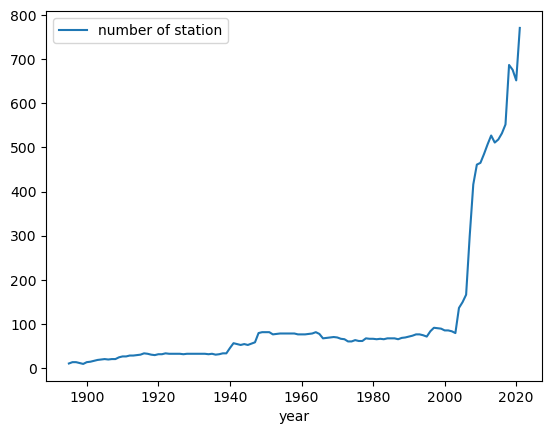

In [35]:
numbStationP.plot()